In [6]:
import re


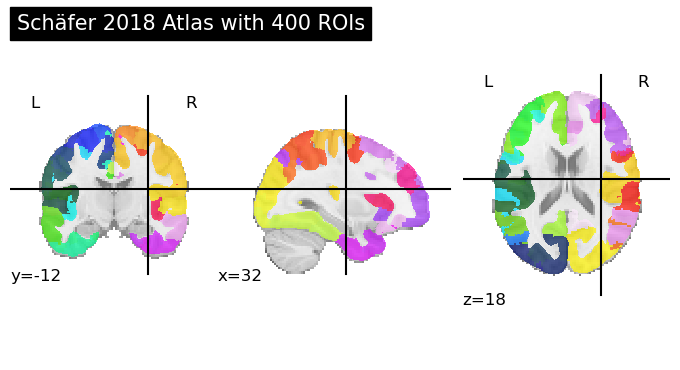

ROI 1: b'7Networks_LH_Vis_1'
ROI 2: b'7Networks_LH_Vis_2'
ROI 3: b'7Networks_LH_Vis_3'
ROI 4: b'7Networks_LH_Vis_4'
ROI 5: b'7Networks_LH_Vis_5'
ROI 6: b'7Networks_LH_Vis_6'
ROI 7: b'7Networks_LH_Vis_7'
ROI 8: b'7Networks_LH_Vis_8'
ROI 9: b'7Networks_LH_Vis_9'
ROI 10: b'7Networks_LH_Vis_10'
ROI 11: b'7Networks_LH_Vis_11'
ROI 12: b'7Networks_LH_Vis_12'
ROI 13: b'7Networks_LH_Vis_13'
ROI 14: b'7Networks_LH_Vis_14'
ROI 15: b'7Networks_LH_Vis_15'
ROI 16: b'7Networks_LH_Vis_16'
ROI 17: b'7Networks_LH_Vis_17'
ROI 18: b'7Networks_LH_Vis_18'
ROI 19: b'7Networks_LH_Vis_19'
ROI 20: b'7Networks_LH_Vis_20'
ROI 21: b'7Networks_LH_Vis_21'
ROI 22: b'7Networks_LH_Vis_22'
ROI 23: b'7Networks_LH_Vis_23'
ROI 24: b'7Networks_LH_Vis_24'
ROI 25: b'7Networks_LH_Vis_25'
ROI 26: b'7Networks_LH_Vis_26'
ROI 27: b'7Networks_LH_Vis_27'
ROI 28: b'7Networks_LH_Vis_28'
ROI 29: b'7Networks_LH_Vis_29'
ROI 30: b'7Networks_LH_Vis_30'
ROI 31: b'7Networks_LH_Vis_31'
ROI 32: b'7Networks_LH_SomMot_1'
ROI 33: b'7Networks_LH_S

In [5]:
from nilearn import datasets
n_rois = 400

# Fetch the Schäfer 2018 atlas with 414 regions
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=n_rois, yeo_networks=7, data_dir="/home/dalai/GNN_E/data")

# Access the atlas labels and images
atlas_img = atlas.maps  # NIfTI image of the atlas
labels = atlas.labels    # List of ROI labels

# Display the atlas image
from nilearn import plotting
plotting.plot_roi(atlas_img, title=f"Schäfer 2018 Atlas with {n_rois} ROIs")
plotting.show()

# Print labels for the ROIs
for i, label in enumerate(labels):
    print(f"ROI {i + 1}: {label}")


In [9]:
fc_names = [re.split('_', label.decode('utf-8'))[2] for label in labels]

# Display the extracted names
print(set(fc_names))

{'Vis', 'Cont', 'DorsAttn', 'SomMot', 'SalVentAttn', 'Default', 'Limbic'}


In [11]:
index = [re.split('_', label.decode('utf-8'))[2] == "Limbic" for label in labels]
limbic_rois = labels[index]

# Display the extracted names
print(limbic_rois)

[b'7Networks_LH_Limbic_OFC_1' b'7Networks_LH_Limbic_OFC_2'
 b'7Networks_LH_Limbic_OFC_3' b'7Networks_LH_Limbic_OFC_4'
 b'7Networks_LH_Limbic_OFC_5' b'7Networks_LH_Limbic_TempPole_1'
 b'7Networks_LH_Limbic_TempPole_2' b'7Networks_LH_Limbic_TempPole_3'
 b'7Networks_LH_Limbic_TempPole_4' b'7Networks_LH_Limbic_TempPole_5'
 b'7Networks_LH_Limbic_TempPole_6' b'7Networks_LH_Limbic_TempPole_7'
 b'7Networks_LH_Limbic_TempPole_8' b'7Networks_RH_Limbic_OFC_1'
 b'7Networks_RH_Limbic_OFC_2' b'7Networks_RH_Limbic_OFC_3'
 b'7Networks_RH_Limbic_OFC_4' b'7Networks_RH_Limbic_OFC_5'
 b'7Networks_RH_Limbic_OFC_6' b'7Networks_RH_Limbic_TempPole_1'
 b'7Networks_RH_Limbic_TempPole_2' b'7Networks_RH_Limbic_TempPole_3'
 b'7Networks_RH_Limbic_TempPole_4' b'7Networks_RH_Limbic_TempPole_5'
 b'7Networks_RH_Limbic_TempPole_6' b'7Networks_RH_Limbic_TempPole_7']


# ###################à

In [ ]:
# Assuming you have your fMRI data in a variable called 'fmri_img'
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# Create a masker to extract time series from the atlas
masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=True)

# Fit the masker to your fMRI data
time_series = masker.fit_transform(fmri_img)

# Compute the correlation matrix
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Visualize the connectivity matrix
import matplotlib.pyplot as plt
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.title("Functional Connectivity Matrix")
plt.colorbar()
plt.show()
